In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mytitanic/Titanic.csv


In [2]:
df = pd.read_csv('/kaggle/input/mytitanic/Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

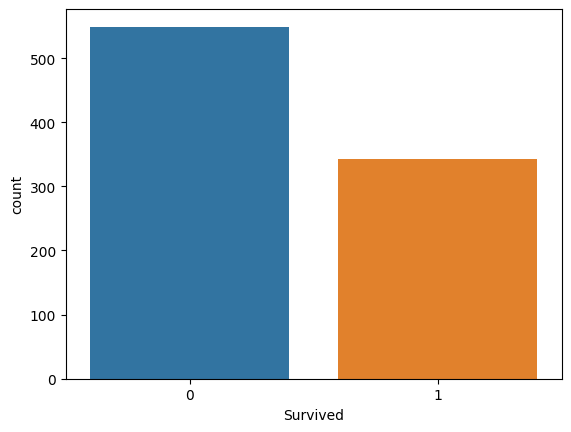

In [5]:
# Оценка выживаемости (0 - погибли, 1 - выжили)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

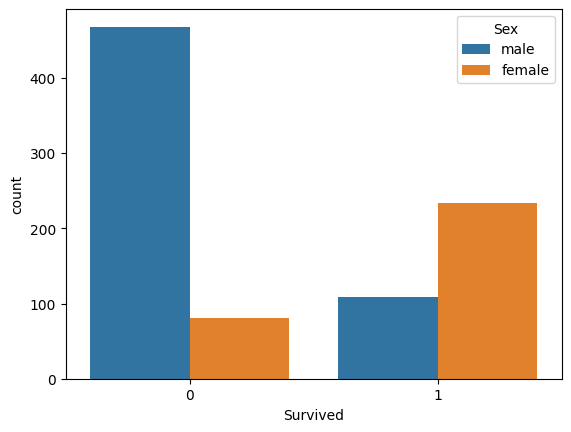

In [6]:
# Оценка выживаемости с разделением по половым признакам (0 - погибли, 1 - выжили)
sns.countplot(x='Survived', hue='Sex', data=df)
# можно сделать вывод о том что погибших мужчин в разы больше чем выживших, 
# а колличество погибших женщин меньше чем выживших

<Axes: xlabel='Survived', ylabel='count'>

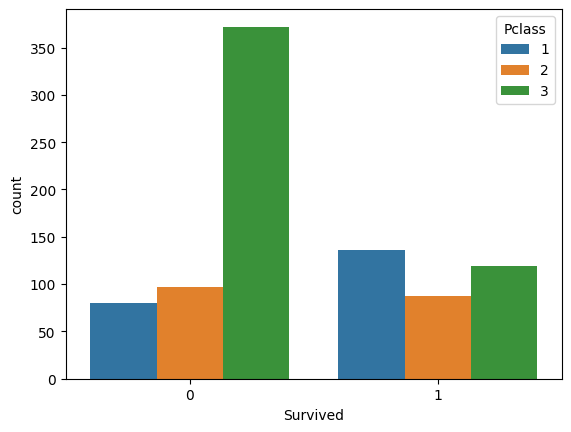

In [7]:
# Зависимость выживания от класса каюты (0 - погибли, 1 - выжили)
sns.countplot(x='Survived', hue='Pclass', data=df)
# Можно сдеть вывод, о том что число выживших из кают первого класса больше
# второго класса приблизительно равно
# третьего класса значительно меньше, чем погибших

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


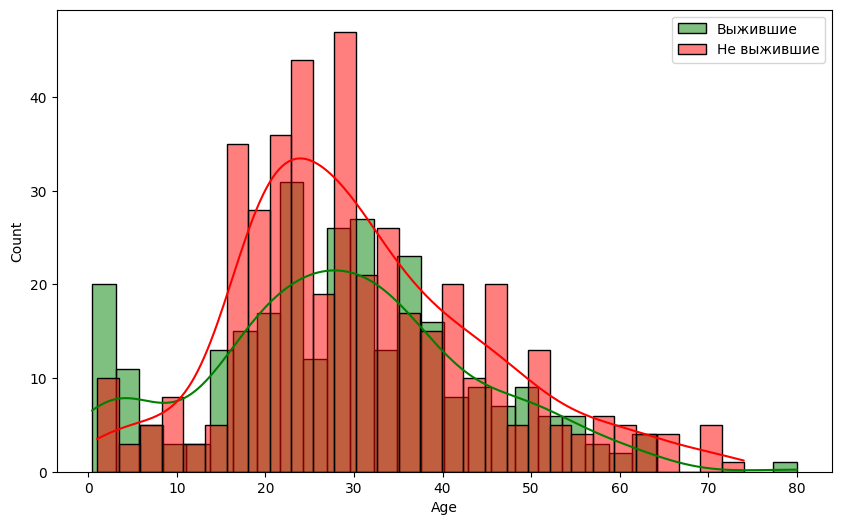

In [8]:
# Выживыемость по возрасту
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, color='green', label='Выжившие', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, color='red', label='Не выжившие', kde=True)
plt.legend()
plt.show()
# Можно сделать вывод о том, что больше шансов на выживание имели дети, 
# Люди среднего возраста имели приблизительно одинаковые шансы на выживание,
# А люди в возрате имели меньше шансов на то чтобы выжить

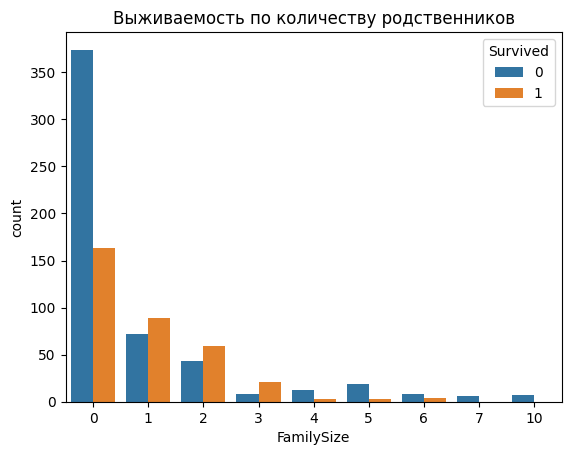

In [9]:
# Выживыемость по количеству родственников на борту (0 - погибли, 1 - выжили)
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Выживаемость по количеству родственников')
plt.show()
# Можно сделать вывод о том , что люди имеющие от 1 до 3 родственников на борту имели больше шансов выжить

In [10]:
# Добавление новых признаков
df['IsChild'] = (df['Age'] < 12).astype(int)# Пассажир является ребенком до 12 лет
df['IsAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)# Пассажир не имеет родственников на борту
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'] + 1)# Стоимость билета, деленная на количество членов семьи

<Axes: xlabel='Survived', ylabel='count'>

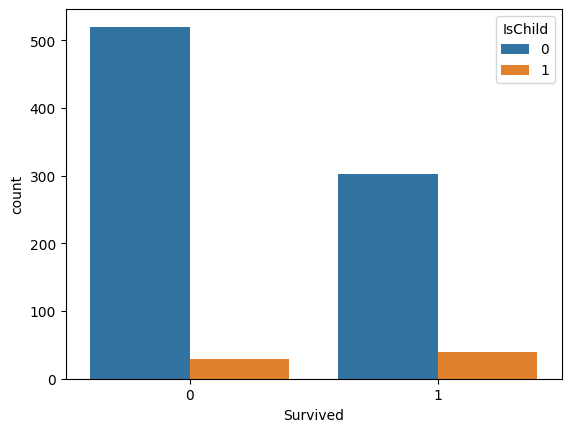

In [11]:
# Выживаемость в зависимости от того, является ли пассажир ребенком или нет
sns.countplot(x='Survived', hue='IsChild', data=df) 
# Можно сделать вывод о том что колличество выживших детей ненамного, но больше чем колличество погибших

In [12]:
df.isnull().sum()
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [13]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
FamilySize         0
IsChild            0
IsAlone            0
FarePerPerson      0
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipykernel_17/1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
FamilySize       0
IsChild          0
IsAlone          0
FarePerPerson    0
dtype: int64

In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2 


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.85)))
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6002 - loss: 19.4041 - val_accuracy: 0.6573 - val_loss: 16.6013
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6443 - loss: 15.8037 - val_accuracy: 0.6923 - val_loss: 13.4531
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6870 - loss: 12.7980 - val_accuracy: 0.7692 - val_loss: 10.8701
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7502 - loss: 10.3413 - val_accuracy: 0.8252 - val_loss: 8.7630
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7675 - loss: 8.3460 - val_accuracy: 0.8322 - val_loss: 7.0530
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 6.7074 - val_accuracy: 0.8462 - val_loss: 5.6734
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7993 - loss: 5.4262 - val_accuracy: 0.8531 - val_loss: 4.5624
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7887 - loss: 4.3858 - val_accuracy: 0.8601 - val_loss: 3.

In [19]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [20]:
model_loaded = joblib.load('fully-connected-model.pkl')

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8182 - loss: 2.2990 - val_accuracy: 0.8462 - val_loss: 1.9346
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8302 - loss: 1.8800 - val_accuracy: 0.8531 - val_loss: 1.5804
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8339 - loss: 1.5384 - val_accuracy: 0.8601 - val_loss: 1.3031
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8271 - loss: 1.2834 - val_accuracy: 0.8462 - val_loss: 1.0914
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8308 - loss: 1.0796 - val_accuracy: 0.8531 - val_loss: 0.9248
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8416 - loss: 0.8888 - val_accuracy: 0.8531 - val_loss: 0.7967
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8091 - loss: 0.8420 - val_accuracy: 0.8462 - val_loss: 0.7036
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8165 - loss: 0.7087 - val_accuracy: 0.8462 - val_loss:

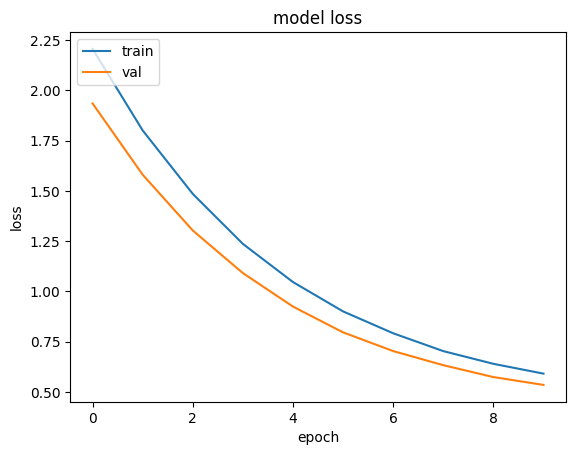

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
# Кросс-валидация
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=32, verbose=0)
    y_pred = (model.predict(X_test_cv) > 0.5).astype("int32")

    print(classification_report(y_test_cv, y_pred))
    print(confusion_matrix(y_test_cv, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       183
           1       0.67      0.46      0.54       114

    accuracy                           0.70       297
   macro avg       0.69      0.66      0.66       297
weighted avg       0.70      0.70      0.69       297

[[157  26]
 [ 62  52]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       183
           1       0.54      0.34      0.42       114

    accuracy                           0.64       297
   macro avg       0.60      0.58      0.58       297
weighted avg       0.62      0.64      0.61       297

[[150  33]
 [ 75  39]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       183
           1       0.59      0.26      0.36       114

    accuracy     

In [23]:
# Матрица ошибок для одного из фолдов
tn, fp, fn, tp = confusion_matrix(y_test_cv, y_pred).ravel()

print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

# Вывод
print("Модель предсказала, что погибнет, а по факту выжили = ", fn)
print("Модель предсказала, что выжили, а по факту погибли = ", fp)
print("Модель предсказала, что выжили, и по факту выжили = ", tp)
print("Модель предсказала, что погибнет, и по факту погиб = ", tn)

TP: 30, TN: 162, FP: 21, FN: 84
Модель предсказала, что погибнет, а по факту выжили =  84
Модель предсказала, что выжили, а по факту погибли =  21
Модель предсказала, что выжили, и по факту выжили =  30
Модель предсказала, что погибнет, и по факту погиб =  162
